### 5a. Creating a dataset

In [1]:
import numpy as np

age = np.random.choice(['Young', 'Middle', 'Old'], size=100)
gen = np.random.choice(['Male', 'Female'], size = 100)
chol = np.random.choice(['High', 'Normal'], size = 100)
hd = np.random.choice(['Yes', 'No'], size = 100)

In [2]:
import pandas as pd

dataset = pd.DataFrame({'Age': age, 'Gender': gen, 'Cholesterol' : chol, 'HeartDisease' : hd})

In [3]:
dataset

,Age,Gender,Cholesterol,HeartDisease
0,Young,Male,High,No
1,Middle,Female,High,Yes
2,Middle,Female,Normal,Yes
3,Old,Male,High,Yes
4,Young,Male,Normal,Yes
...,...,...,...,...
95,Middle,Female,High,No
96,Middle,Female,Normal,No
97,Young,Female,Normal,No
98,Middle,Female,Normal,Yes


### b. Constructing Bayesian Network

In [4]:
import pandas as pd
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.inference import VariableElimination

In [5]:
model = BayesianNetwork([
    ('Age', 'HeartDisease'),
    ('Gender', 'HeartDisease'),
    ('Cholesterol', 'HeartDisease')
])

In [6]:
model.fit(dataset, estimator=MaximumLikelihoodEstimator)

In [7]:
inference = VariableElimination(model)

In [8]:
q1 = inference.query(variables=['HeartDisease'],
                    evidence={'Age': 'Middle', 'Gender': 'Male', 'Cholesterol': 'High'})
q2 = inference.query(variables=['HeartDisease'],
                    evidence={'Age': 'Middle', 'Gender': 'Female', 'Cholesterol': 'Normal'})
print("Age: Middle, Gender: Male, Cholesterol: High")
print(q1)

print("\n\nAge: Middle, Gender: Female, Cholesterol: Normal")
print(q2)

Age: Middle, Gender: Male, Cholesterol: High
+-------------------+---------------------+
| HeartDisease      |   phi(HeartDisease) |
+===================+=====================+
| HeartDisease(No)  |              0.6000 |
+-------------------+---------------------+
| HeartDisease(Yes) |              0.4000 |
+-------------------+---------------------+


Age: Middle, Gender: Female, Cholesterol: Normal
+-------------------+---------------------+
| HeartDisease      |   phi(HeartDisease) |
+===================+=====================+
| HeartDisease(No)  |              0.5455 |
+-------------------+---------------------+
| HeartDisease(Yes) |              0.4545 |
+-------------------+---------------------+


### Plotting graph

In [9]:
import networkx as nx

model = BayesianNetwork([
    ('Age', 'Gender'),
    ('Gender', 'HeartDisease'),
    ('Cholesterol', 'HeartDisease')
])

In [10]:
G = nx.DiGraph()
G.add_nodes_from(model.nodes())
G.add_edges_from(model.edges())

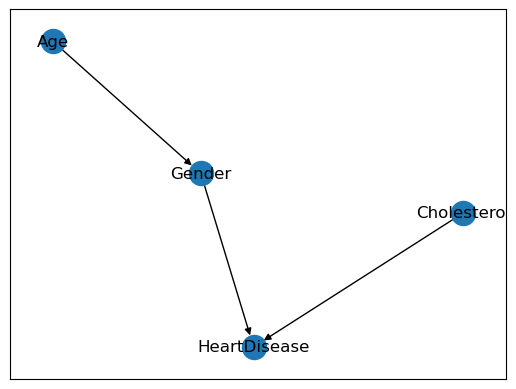

In [11]:
nx.draw_networkx(G, with_labels=True)